# Introduction computer vision et machine learning 

## Chargement des data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import DistanceMetric
from time import perf_counter 

In [50]:
def plot_gallery(images):
# Affiche les 12 premières images contenues dans images
# images est de taille Nb image*Ny*Nx
    plt.figure(figsize=(7.2, 7.2))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

In [51]:
from tempfile import TemporaryFile
import imageio
from PIL import Image 
import numpy as np

In [54]:
#charger et afficher les données 
[X, y, name]=np.load("TP1.npy",allow_pickle=True )

print("X :\t{}".format(X))
print("y :\t{}".format(y))
print("name :\t{}".format(name))

X :	[[[253.66667  254.33333  253.66667  ...  56.333332  46.666668  39.      ]
  [254.       254.       253.       ...  58.        48.333332  40.666668]
  [250.       247.       243.33333  ...  56.666668  48.333332  42.333332]
  ...
  [ 73.333336  58.        39.666668 ...  94.333336  91.333336  86.666664]
  [ 65.666664  51.666668  37.333332 ...  90.666664  90.333336  85.333336]
  [ 60.        50.        37.666668 ...  87.        88.        86.666664]]

 [[ 38.333332  43.        53.       ...  57.        46.        35.666668]
  [ 43.666668  55.333332  61.333332 ...  57.        52.666668  42.333332]
  [ 47.666668  64.666664  74.       ...  53.333332  51.666668  42.333332]
  ...
  [ 73.666664  75.666664  76.333336 ... 122.666664 114.333336 116.333336]
  [ 76.        76.        76.333336 ... 118.666664 113.333336 120.333336]
  [ 77.333336  77.        76.       ... 114.666664 116.666664 143.66667 ]]

 [[ 88.        92.666664 112.666664 ... 150.66667  150.66667  148.66667 ]
  [ 93.       112.

In [ ]:
plot_gallery(X)

In [55]:
print("la taille des images est : ", len(X[0]),'x',len(X[0][0]),"pixels")
print("le nombre  d'images est : ", len(y))
print("le nombre de classes est : ", len(name))

la taille des images est :  62 x 47 pixels
le nombre  d'images est :  1288
le nombre de classes est :  7


In [57]:
#afficher le nombre de classes 
new_y = np.unique(y)

for j,i in np.c_[new_y,name]:
    print(j," : ",i)

0  :  Ariel Sharon
1  :  Colin Powell
2  :  Donald Rumsfeld
3  :  George W Bush
4  :  Gerhard Schroeder
5  :  Hugo Chavez
6  :  Tony Blair


(array([ 77., 236., 121., 530., 109.,  71., 144.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

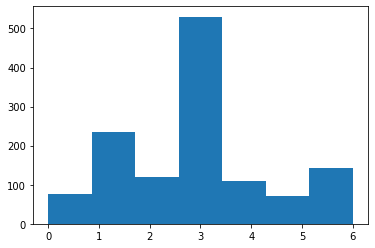

In [58]:
#afficher un histogramme des classes 
plt.hist(y, bins=7)

In [59]:
#faire un split 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
#affciher les dimensions des vecteurs de test et de train 
print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

966
322
(966, 62, 47)
(322, 62, 47)
(966,)
(322,)


## Prétraitement des données:

In [71]:
#redimensionnement des données 
# X_train -> (966, 2914)
# X_test -> (322, 2914)
X_train = X_train.reshape(966, 2914)
X_test = X_test.reshape(322, 2914)


Standardiser les fonctionnalités en supprimant la moyenne et en mettant à l'échelle la variance unitaire

Le score standard d'un échantillon x est calculé comme suit:

z = (x - u) / s

Où u est la moyenne des échantillons d'apprentissage ou 0 si with_mean=False, et s est l'écart type des échantillons d'apprentissage ou 1 si with_std=False.

Le centrage et la mise à l'échelle se produisent indépendamment sur chaque fonctionnalité en calculant les statistiques pertinentes sur les échantillons de l'ensemble d'apprentissage. La moyenne et l'écart type sont ensuite stockés pour être utilisés sur des données ultérieures à l'aide de la transformation.

Trouver la fonction qui le fait et appliquer la sur les data

In [79]:
from sklearn import preprocessing

#standardiser vos données (train et test)
scaler = preprocessing.StandardScaler().fit(X_train)
print("scaler.mean : {}".format(scaler.mean_))

X_train =   scaler.transform(X_train)
X_test =    scaler.transform(X_test)

scaler.mean : [ 92.27363703  95.47998606 101.51414783 ... 117.98999297 111.65320892
 105.66494127]


In [129]:
#Faire un classifieur kppv avec k=1:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [93]:
neigh.score(X_test, y_test)

0.577639751552795

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

#faire une prediction sur X
y_pred = neigh.predict(X_test)
y_pred # prediciton, 1ere case = 6 alors que c'est 3 en vrai, on fait la moyenne sur tout ça et ça donne 57% de prédicitons juste

array([6, 3, 6, 3, 3, 3, 1, 1, 0, 3, 3, 3, 1, 4, 3, 4, 6, 3, 3, 4, 1, 2,
       3, 0, 0, 1, 1, 3, 3, 4, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 1, 1, 6, 0, 3, 3, 3, 0, 1, 6, 2, 2, 5, 3, 3, 1, 1, 0, 4, 0, 3,
       6, 2, 3, 3, 1, 6, 5, 3, 3, 2, 5, 6, 3, 4, 3, 1, 4, 1, 3, 3, 3, 3,
       6, 3, 3, 6, 3, 2, 6, 5, 1, 1, 3, 2, 3, 1, 3, 2, 3, 4, 3, 3, 5, 3,
       3, 1, 6, 3, 6, 4, 6, 4, 1, 1, 1, 3, 3, 0, 3, 4, 6, 3, 3, 2, 6, 3,
       0, 5, 1, 2, 5, 3, 3, 6, 0, 2, 5, 1, 3, 3, 5, 3, 3, 6, 5, 1, 3, 6,
       3, 3, 6, 3, 1, 3, 6, 4, 5, 1, 3, 5, 5, 1, 5, 6, 3, 1, 3, 1, 4, 3,
       3, 2, 2, 3, 3, 3, 3, 1, 6, 2, 3, 5, 3, 2, 3, 2, 4, 2, 6, 3, 3, 3,
       3, 6, 3, 2, 4, 1, 3, 3, 6, 2, 3, 0, 4, 3, 3, 3, 2, 3, 3, 3, 4, 3,
       6, 3, 1, 4, 1, 3, 2, 3, 1, 3, 3, 3, 3, 0, 2, 2, 6, 3, 3, 3, 3, 0,
       2, 6, 6, 4, 3, 3, 6, 4, 6, 3, 3, 3, 3, 4, 2, 6, 5, 3, 3, 6, 3, 1,
       3, 6, 3, 1, 3, 3, 1, 1, 2, 3, 6, 2, 3, 3, 5, 6, 6, 1, 3, 3, 1, 3,
       3, 3, 3, 4, 4, 3, 5, 0, 3, 3, 5, 5, 3, 3, 3,

In [131]:
y_test

array([3, 3, 6, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 4, 1, 2,
       3, 2, 0, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1,
       1, 1, 4, 3, 2, 3, 3, 3, 0, 3, 6, 2, 1, 3, 5, 3, 1, 1, 1, 4, 3, 5,
       6, 4, 1, 3, 5, 6, 3, 3, 3, 2, 1, 6, 4, 4, 3, 0, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 3, 4, 1, 5, 1, 1, 6, 6, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1,
       4, 1, 3, 3, 3, 1, 3, 4, 1, 3, 1, 3, 3, 0, 3, 4, 4, 3, 1, 1, 6, 6,
       6, 6, 2, 4, 3, 3, 1, 6, 2, 2, 5, 1, 3, 5, 1, 3, 6, 1, 5, 1, 1, 3,
       3, 3, 6, 0, 1, 3, 6, 5, 5, 1, 3, 5, 5, 1, 0, 3, 1, 1, 6, 1, 5, 6,
       3, 2, 2, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 6, 3, 3, 6,
       3, 6, 3, 2, 1, 2, 3, 3, 6, 2, 1, 0, 3, 5, 3, 3, 3, 3, 3, 0, 0, 1,
       3, 3, 1, 1, 6, 3, 3, 3, 1, 3, 3, 3, 1, 0, 3, 1, 6, 3, 3, 3, 3, 4,
       2, 4, 3, 0, 3, 3, 3, 6, 4, 3, 2, 6, 3, 4, 2, 1, 6, 2, 2, 3, 6, 1,
       3, 4, 3, 1, 4, 6, 1, 1, 3, 3, 6, 3, 6, 3, 3, 3, 1, 2, 3, 3, 1, 0,
       3, 3, 3, 4, 4, 3, 5, 1, 3, 0, 4, 1, 3, 4, 3,

In [126]:
print(accuracy_score(y_test, y_pred))
#0  :  Ariel Sharon
#1  :  Colin Powell
#2  :  Donald Rumsfeld
#3  :  George W Bush
#4  :  Gerhard Schroeder
#5  :  Hugo Chavez
#6  :  Tony Blair

0.577639751552795


array([[  5,   1,   0,   4,   2,   1,   0],
       [  2,  31,   4,  12,   4,   3,   4],
       [  3,   5,  15,   4,   0,   0,   0],
       [  2,   5,   9, 102,   6,   7,  15],
       [  1,   2,   3,   5,   9,   1,   4],
       [  0,   1,   0,   4,   2,   8,   0],
       [  1,   3,   2,  10,   2,   2,  16]], dtype=int64)

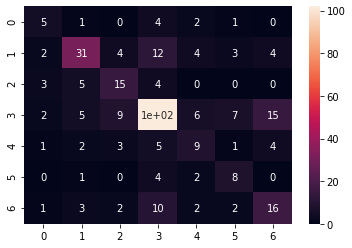

In [134]:
import seaborn as sns

#afficher la matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
confusion_matrix(y_test, y_pred)

In [177]:
# 1. calculer la précision avec 2 neighbor cette fois :

neigh2 = KNeighborsClassifier(n_neighbors=2, p=1)
neigh2.fit(X_train, y_train)
neigh2.score(X_test, y_test)



0.593167701863354

In [219]:
neighArray = []

for i in range(1,6):
    neighTemp = KNeighborsClassifier(n_neighbors=i)
    neighTemp.fit(X_train, y_train)
    neighArray.append([i,neighTemp.score(X_test, y_test)])
    #np.append(neighArray, neighTemp.score(X_test, y_test))

mat = np.array(neighArray)


[[1, 0.577639751552795], [2, 0.5652173913043478], [3, 0.5962732919254659], [4, 0.6366459627329193], [5, 0.6273291925465838]]


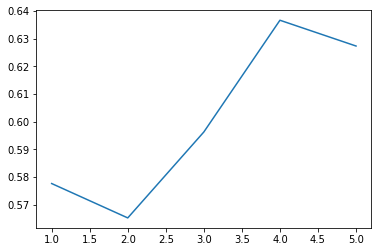

In [221]:
import matplotlib.pyplot as plt 

#b. afficher l'evolution du score du KNeighborsClassifier :
print(neighArray)
x, y = zip(*neighArray)
plt.plot(x,y)

In [224]:
neighArray2 = []

for i in range(1,6):
    neighTemp = KNeighborsClassifier(n_neighbors=i, p=1)
    neighTemp.fit(X_train, y_train)
    neighArray2.append([i,neighTemp.score(X_test, y_test)])

mat2 = np.array(neighArray2)

[[1, 0.5993788819875776], [2, 0.593167701863354], [3, 0.6490683229813664], [4, 0.65527950310559], [5, 0.6645962732919255]]


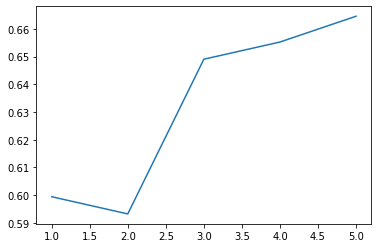

In [226]:
#c. afficher le meme graphique avec une distance de Manhattan:
#Que remarquez vous 

print(neighArray)
x, y = zip(*neighArray)
plt.plot(x,y)